---
# Predictive Insights: Analyzing Asset Performance with Advanced Simulation Techniques


## Project Objective
This project is designed to conduct a comprehensive analysis of the investment performance of various assets, including Bitcoin, Ethereum, S&P 500, and Gold. By leveraging historical price data from January 2020 to March 2024, the study aims to dive into the dynamics of these assets, examining their price movements and evaluating their performance from the perspectives of risk and return.

The analysis will focus on the calculation of key financial metrics to illuminate the risk-return trade-offs and the correlations between these assets. Additionally, the study will assess the impact of different monthly investment amounts like $10, $50, and $100. 

To enhance the robustness of the predictions about future market behaviors, both Long Short-Term Memory (LSTM) models and Monte Carlo simulations will be employed. These methodologies will be applied to determine the feasibility of predicting market trends based solely on date and price data, aiming to uncover deeper insights into the potential predictive power of these models within the complex landscape of financial markets.

The objective is to not only understand historical performance but also to explore the effectiveness of analytical techniques in forecasting future asset valuations, providing a valuable resource for strategic investment planning.

**Important Note: I am not a finance expert, so please refrain from relying solely on this information for investment decisions. Remember that investing carries inherent risks, and you should be prepared for potential losses. I'm conducting this analysis purely for educational and entertainment purposes and not as professional trading advice. Always conduct thorough research and consider seeking guidance from qualified financial advisors before making investment decisions.**



**Workflow:**
* Data Source and Selection 
* Viewing the Data
* Simulating Monthly Investments
* Relationship & the Correlation of Assets
* Correlation Matrixs as a Heatmap:
* Performance of Each Asset Investment
* Risk Return Trade Off
* Comparative Analysis
* Investment Outcomes
* Moving Average Trends
* Machine Learning Model for Time Series Prediction LSTM Neural Network Setup
* MSE, RMSE, MAE, and MAPE
* Monte Carlo Simulation using Geometric Brownian Motion
* Monte Carlo Simulation Validation
* Conclusion 


To support the analysis and modeling for this project, a selection of powerful Python libraries will be utilized, each chosen for its specific capabilities in handling data processing, statistical modeling, and visualization:

* Pandas and NumPy: These foundational libraries provide extensive functionalities for data manipulation and numerical computations. Pandas offers data structures and operations for manipulating numerical tables and time series, making it ideal for handling financial datasets. NumPy supports large, multi-dimensional arrays and matrices, along with a vast collection of mathematical functions to operate on these arrays.

* Matplotlib and Seaborn: These libraries are used for creating static, interactive, and animated visualizations in Python. Matplotlib serves as the base framework, offering a multitude of plotting functions. Seaborn extends Matplotlib by providing a high-level interface for drawing attractive and informative statistical graphics.

* Scikit-learn: This library features various preprocessing tools and metrics, including MinMaxScaler for feature scaling and mean_squared_error, mean_absolute_error for evaluating model performance. These tools are critical for preparing the dataset for modeling and assessing the accuracy of the predictive models.

* TensorFlow and Keras: TensorFlow is an open-source library for machine learning and numerical computation using data flow graphs. Keras, a high-level neural networks API, runs on top of TensorFlow, making it easy to construct and train neural network models like LSTM. In this project, it facilitates the development of LSTM models, which are enhanced with layers such as Dropout, Dense, Bidirectional, and BatchNormalization to improve model performance and prevent overfitting.

* Train Test Split: This function from sklearn.model_selection is vital for dividing the dataset into training and testing sets, a crucial step in validating the performance of predictive models against unseen data.

* Adam Optimizer and Early Stopping: Adam, an optimizer from TensorFlow, is employed for its efficient computation and memory usage in training models. EarlyStopping is a callback used during training to stop training when a monitored metric has stopped improving, preventing overfitting and enhancing model generalization.

* Math and SciPy: The math module provides access to mathematical functions like logarithms and exponential functions, which are essential for financial calculations. pearsonr from SciPy is used for calculating the Pearson correlation coefficient to assess the linear relationship between simulated outcomes and historical data.

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense, Bidirectional, BatchNormalization
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import math
from scipy.stats import pearsonr


In [21]:
def load_data(file_path):
    data = pd.read_csv(file_path, parse_dates=['Date'])
    data.set_index('Date', inplace=True)
    return data

In [22]:
def get_last_day_of_month(data):
    
    # This method ensures we are only getting the last day available in each month.
    return data.resample('M').last()

**Data Source and Selection (2020-2024 Data):** The project utilizes historical price data spanning from the year 2020 to 2024 for Bitcoin, Ethereum, the S&P 500 index, and Gold. These datasets serve as the foundation for the analysis and allow us to capture the market behavior and trends prevalent during that period. The data was gathered using a API which is not included in this code. 

In [23]:
# Load each dataset
bitcoin_data = get_last_day_of_month(load_data(r'C:\Users\ARighas\Downloads\bitcoin_p.csv'))
ethereum_data = get_last_day_of_month(load_data(r'C:\Users\ARighas\Downloads\ethereum_p.csv'))
gold_data = get_last_day_of_month(load_data(r'C:\Users\ARighas\Downloads\gold_p.csv'))
sp500_data = get_last_day_of_month(load_data(r'C:\Users\ARighas\Downloads\sp500_p.csv'))

**Viewing the Data:** Here we take a look at the datasets so we can understand what kind of data is going to be utilized. 

In the below code we can understand what kind of data there is. As we can see we have the Date, Open, High, Low, Close and Adj Close. This analysis will rely on dates and close prices for each asset. 

In [39]:
# Verify the DataFrame structure
print(bitcoin_data.columns)
print(ethereum_data.columns)
print(gold_data.columns)
print(sp500_data.columns)

# Print the first few rows to confirm data 
print(bitcoin_data.head())
print(ethereum_data.head())
print(gold_data.head())
print(sp500_data.head())



Index(['Open', 'High', 'Low', 'Close', 'Adj Close'], dtype='object')
Index(['Close'], dtype='object')
Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
                   Open         High          Low        Close    Adj Close
Date                                                                       
2020-01-31  9508.313477  9521.706055  9230.776367  9350.529297  9350.529297
2020-02-29  8671.212891  8775.631836  8599.508789  8599.508789  8599.508789
2020-03-31  6430.606445  6504.515137  6374.162109  6438.644531  6438.644531
2020-04-30  8797.669922  9440.650391  8533.255859  8658.553711  8658.553711
2020-05-31  9700.105469  9700.343750  9432.296875  9461.058594  9461.058594
                 Close
Date                  
2020-01-31  184.726218
2020-02-29  227.705285
2020-03-31  132.363739
2020-04-30  215.548173
2020-05-31  242.709770
                   Open         High          L

**Simulating Monthly Investments:** The purpose of this function is to model the real-world scenario of making regular investments in a financial instrument (like stocks or cryptocurrency). It calculates how much of the asset you would own over time based on your monthly investments and the asset's fluctuating prices. Below we will simulate monthly investments for each asset. The investement amounts are 10, 50 and 100. The function below calculates investment outcomes based monthly data. It also calculates a cumulative investement, units purchased each month and the total value based on each assets closing price.

In order to make the data more readable and to allign with the analysis, it will need to be broken into monthly invervals. 


In [25]:
def simulate_investments(data, investments):
   
    # DataFrame to hold investment results
    results = pd.DataFrame(index=data.index)

    for investment in investments:
        # Column names for tracking investment results
        col_investment = f'investment_{investment}'
        col_cumulative = f'cumulative_{investment}'
        col_units = f'units_{investment}'
        col_total_value = f'total_value_{investment}'

        # Monthly investment logic
        results['price'] = data['Close']
        results[col_investment] = investment
        month_indices = np.arange(1, len(results) + 1)
        results[col_cumulative] = month_indices * investment
        results[col_units] = investment / data['Close']
        results[col_units] = results[col_units].cumsum()
        results[col_total_value] = results[col_units] * data['Close']

    return results

# Define investment amounts
investments = [100, 50, 10]

**Relationship & the Correlation of Assets:** Evaluating the impact of each assets volatility on regular investments can help in understnading how different assets behave under market stress or growth periods. The metrics for Annual returns, Volatility(Standard Deviation) and Sharpe ratios are fundemental in evaluating and comparing investment performance. 

* Annual returns: gives a sense of how much an investment grows or shrinks on average in the specified time scale. 
* Volatility (standard deviation): measuring the risk associated with each investment, showing how much the price will fluctuate.
* Sharpe ratios: measures how much excess return you will receive for the extra volatility that you endure for holding a riskier asset. Usually a higher sharpe ratio is better indicating a more favorable risk return trade off. 

To approach a clear and visual understanding of how different investments relate to each other it is critical to create a correlation matrix visualized as a heatmap. This heatmap will help in identifiying assest that move together or even help in managing risk. This will also help reduce systemic risk if investors are looking for assets that are less correlated with their primary investments.

Each step taken in this script contributes to building a comprehensive picture of investment performance. The goal is to use historical data to simulate realistic investemnt scenarios, analyze the scenerios under different metrics and draw conclusions for a better understanding. 

Moreover we save the new variables in a new data frame by the name of the asset(lets say bitcoin) and add a (bitcoin)_results.
This step is crucial to give the correct investment numbers for the analysis.

In [35]:
# Simulate investments for each dataset
bitcoin_results = simulate_investments(bitcoin_data, investments)
ethereum_results = simulate_investments(ethereum_data, investments)
gold_results = simulate_investments(gold_data, investments)
sp500_results = simulate_investments(sp500_data, investments)

# DataFrames are now kept in memory and include all requested data
bitcoin_results, ethereum_results, gold_results, sp500_results


# Function to extract prices into a single DataFrame for correlation analysis
def extract_prices(*datasets):
    prices = pd.DataFrame(index=datasets[0].index)
    labels = ['Bitcoin', 'Ethereum', 'Gold', 'SP500']
    for label, dataset in zip(labels, datasets):
        prices[label] = dataset['price']
    return prices

# Extract price data
prices = extract_prices(bitcoin_results, ethereum_results, gold_results, sp500_results)

# Calculate daily returns
daily_returns = prices.pct_change()

# Calculate annualized average return and standard deviation
annual_returns = daily_returns.mean() * 252  # 252 trading days per year
annual_std_dev = daily_returns.std() * np.sqrt(252)

# Assuming a risk-free rate of 0 for simplicity
risk_free_rate = 0
sharpe_ratios = annual_returns / annual_std_dev

# Verify the DataFrame structure
print(bitcoin_results.columns)
print(ethereum_results.columns)
print(gold_results.columns)
print(sp500_results.columns)

# Print the first few rows to confirm data 
print(bitcoin_results.head())
print(ethereum_results.head())
print(gold_results.head())
print(sp500_results.head())

Index(['price', 'investment_100', 'cumulative_100', 'units_100',
       'total_value_100', 'investment_50', 'cumulative_50', 'units_50',
       'total_value_50', 'investment_10', 'cumulative_10', 'units_10',
       'total_value_10'],
      dtype='object')
Index(['price', 'investment_100', 'cumulative_100', 'units_100',
       'total_value_100', 'investment_50', 'cumulative_50', 'units_50',
       'total_value_50', 'investment_10', 'cumulative_10', 'units_10',
       'total_value_10'],
      dtype='object')
Index(['price', 'investment_100', 'cumulative_100', 'units_100',
       'total_value_100', 'investment_50', 'cumulative_50', 'units_50',
       'total_value_50', 'investment_10', 'cumulative_10', 'units_10',
       'total_value_10'],
      dtype='object')
Index(['price', 'investment_100', 'cumulative_100', 'units_100',
       'total_value_100', 'investment_50', 'cumulative_50', 'units_50',
       'total_value_50', 'investment_10', 'cumulative_10', 'units_10',
       'total_value_10']

**Correlation Matrixs as a Heatmap:** As we can see below we have a few correlating assets. To understand this correlation we need to understand how to read it first. A correlation matrix is a table showing correlation coefficients between variables. This ranges from +1 (which indicates a perfect positive relationship; if one asset increases than the other asset also increases), -1 (this indicates a perfect negative relationship; if one asset increases then the other decreases by a proportionate amount), and 0 (A correlation of 0 implies no relationship between the two assets). Anything between 0 and +1 like 0.7 we can safely safe that asset is positively correlated with the other asset or vice versa.

To understand the Heatmap we need to look at one distinct factor.

Color Scheme:

* Red or warm colors: represent stronger positive correlations.
* Blue or cool colors: typically represent stronger negative correlations.
* Neutral colors: indicate little to no correlation.

Below we can identify that the assets Bitcoin and Ethereum are strongly positively correlated. We can also identify suprisingly that the S&P 500 is positively correlated. Another observation is that Gold is not really correlated with any other asset in this asset pool.

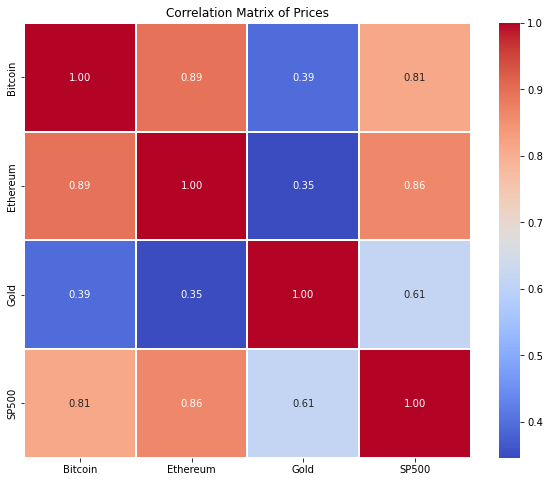

Annual Returns:
Bitcoin     15.560190
Ethereum    23.592847
Gold         1.908987
SP500        2.859260
dtype: float64

Annual Standard Deviation:
Bitcoin     3.306200
Ethereum    4.287207
Gold        0.661378
SP500       0.887357
dtype: float64

Sharpe Ratios:
Bitcoin     4.706367
Ethereum    5.503080
Gold        2.886377
SP500       3.222221
dtype: float64


In [27]:
# Create correlation matrix
correlation_matrix = prices.corr()

# Plot correlation matrix
plt.figure(figsize=(10, 8))
plt.title('Correlation Matrix of Prices')
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.05)
plt.show()

# Print financial metrics
print("Annual Returns:")
print(annual_returns)
print("\nAnnual Standard Deviation:")
print(annual_std_dev)
print("\nSharpe Ratios:")
print(sharpe_ratios)

**Performance of Each Asset Investment:** By visualizing these investments on the same chart we can easily compare their performance relative to each other over the same periods. This helps in quickly assessing which assets have been more volatile and which have provided steady returns. It also provides a clear understanding how each asset have performed with regular investements of 100 dollars per month. As we can see below the chart shows that Ethereum has a clear advantage over the other currencies. The line chart illustrates a parallel trend in the growth trajectories of Gold and the S&P 500, indicating that both assets have experienced similar rates of increase over the defined period. We can see the same applies with the 10 and 50 dollar graphs.

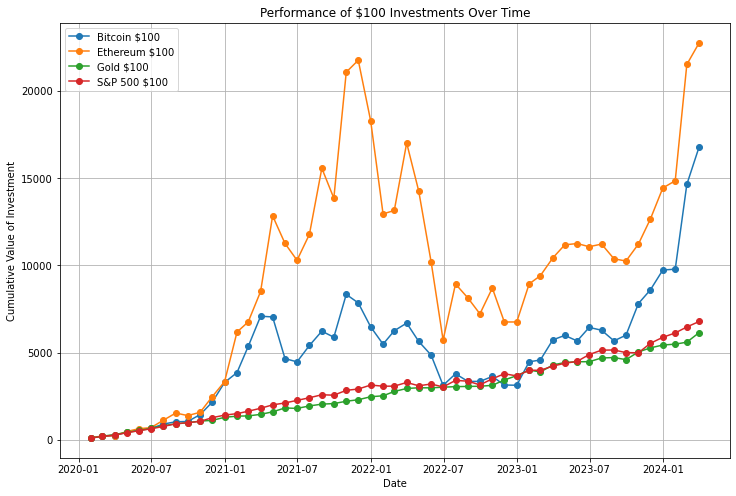

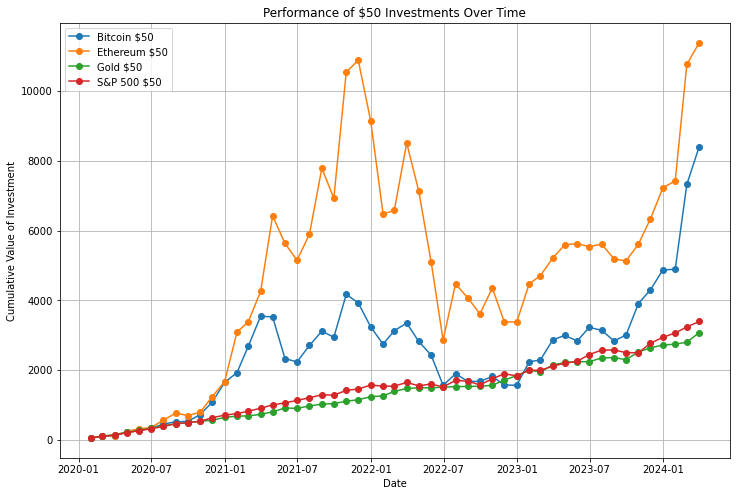

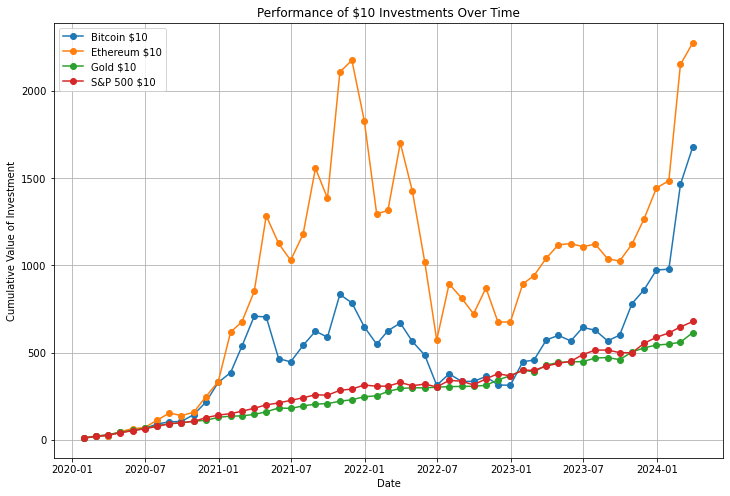

In [28]:
# Continue to display results
bitcoin_results, ethereum_results, gold_results, sp500_results


# Extract the cumulative value columns for the $100 investment from each results DataFrame
bitcoin_100_values = bitcoin_results['total_value_100']
ethereum_100_values = ethereum_results['total_value_100']
gold_100_values = gold_results['total_value_100']
sp500_100_values = sp500_results['total_value_100']

# Create a line chart to show the performance of each $100 investment
plt.figure(figsize=(12, 8))
plt.plot(bitcoin_100_values.index, bitcoin_100_values, label='Bitcoin $100', marker='o')
plt.plot(ethereum_100_values.index, ethereum_100_values, label='Ethereum $100', marker='o')
plt.plot(gold_100_values.index, gold_100_values, label='Gold $100', marker='o')
plt.plot(sp500_100_values.index, sp500_100_values, label='S&P 500 $100', marker='o')

plt.title('Performance of $100 Investments Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Value of Investment')
plt.legend()
plt.grid(True)
plt.show()

# Extract the cumulative value columns for the $50 investment from each results DataFrame
bitcoin_50_values = bitcoin_results['total_value_50']
ethereum_50_values = ethereum_results['total_value_50']
gold_50_values = gold_results['total_value_50']
sp500_50_values = sp500_results['total_value_50']

# Create a line chart to show the performance of each $50 investment
plt.figure(figsize=(12, 8))
plt.plot(bitcoin_50_values.index, bitcoin_50_values, label='Bitcoin $50', marker='o')
plt.plot(ethereum_50_values.index, ethereum_50_values, label='Ethereum $50', marker='o')
plt.plot(gold_50_values.index, gold_50_values, label='Gold $50', marker='o')
plt.plot(sp500_50_values.index, sp500_50_values, label='S&P 500 $50', marker='o')

plt.title('Performance of $50 Investments Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Value of Investment')
plt.legend()
plt.grid(True)
plt.show()

# Extract the cumulative value columns for the $10 investment from each results DataFrame
bitcoin_10_values = bitcoin_results['total_value_10']
ethereum_10_values = ethereum_results['total_value_10']
gold_10_values = gold_results['total_value_10']
sp500_10_values = sp500_results['total_value_10']

# Create a line chart to show the performance of each $10 investment
plt.figure(figsize=(12, 8))
plt.plot(bitcoin_10_values.index, bitcoin_10_values, label='Bitcoin $10', marker='o')
plt.plot(ethereum_10_values.index, ethereum_10_values, label='Ethereum $10', marker='o')
plt.plot(gold_10_values.index, gold_10_values, label='Gold $10', marker='o')
plt.plot(sp500_10_values.index, sp500_10_values, label='S&P 500 $10', marker='o')

plt.title('Performance of $10 Investments Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Value of Investment')
plt.legend()
plt.grid(True)
plt.show()


**Risk Return Trade Off:** This scatter plot illistrates the relationship between the risk and the return of the different assets. Its a fundamental concept in finance that higher risk or volatility is assosiated with the potential for higher returns but greater losses. Hypothetically investors can use this scatter plot to choose assets that align with their risk tolerance and return expectations. For instance, an asset that lies further to the right (higher standard deviation) and higher (higher return) might be suitable for risk-tolerant investors, whereas one closer to the origin might be suitable for risk-averse investors. Understanding how assets behave in terms of risk and return can provide insights into their underlying characteristics and market dynamics. 

As we can observe from the scatter plot below it is obvious that there is a higher risk in Bitcoin and Ethereum but with higher returns. We can also identify that Gold and the S&P 500 have a low risk in comparison but with lower return as well.

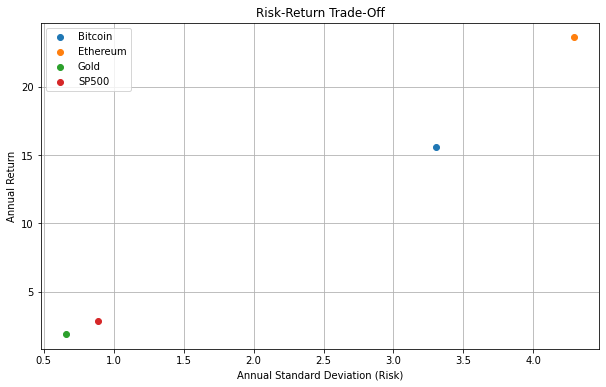

In [29]:
# Create a scatter plot for the risk-return trade off
plt.figure(figsize=(10, 6))
for i, label in enumerate(['Bitcoin', 'Ethereum', 'Gold', 'SP500']):
    plt.scatter(annual_std_dev[label], annual_returns[label], label=label)

plt.title('Risk-Return Trade-Off')
plt.xlabel('Annual Standard Deviation (Risk)')
plt.ylabel('Annual Return')
plt.legend()
plt.grid(True)
plt.show()


**Comparative Analysis:** By plotting both the actual price and the cumulative values of each assets on the same graph we can get a clear comparison of how an initial investment would grow reletively to the changes in the assets price. It can also help in understanding the impact of market price fluctuations on investments. 

The graphs below can allow investors to visually assess how different investment strategies would have performed over time. Seeing the assets price alongside the investment returns provides insights into how responsive the investment returns are to market conditions. For instance, if the asset price is highly volatile, but the investment returns are relatively stable, it might suggest that the investment strategy is effective at mitigating risk.


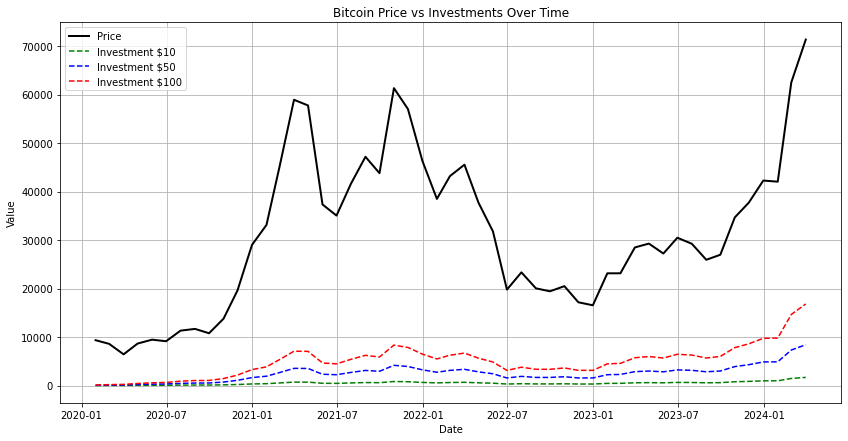

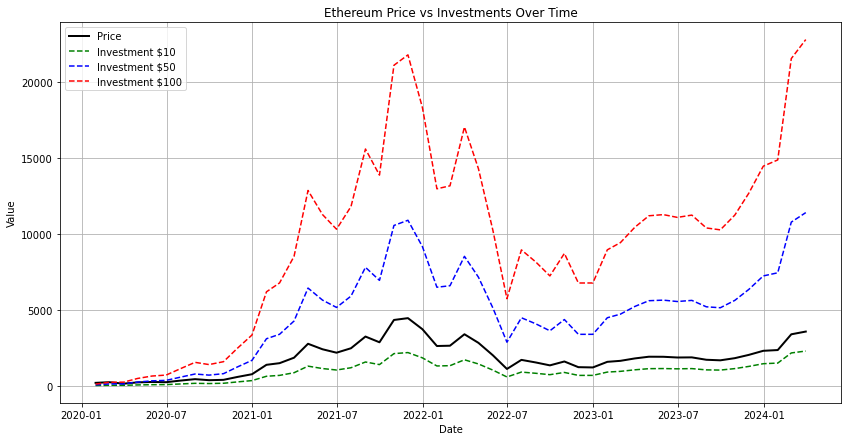

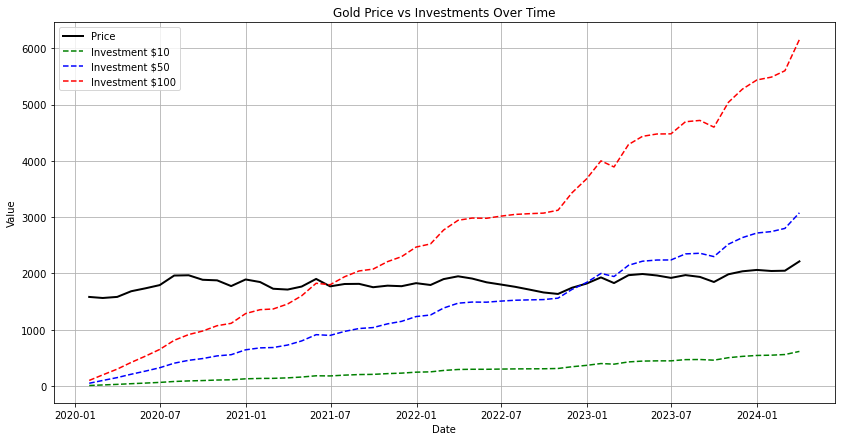

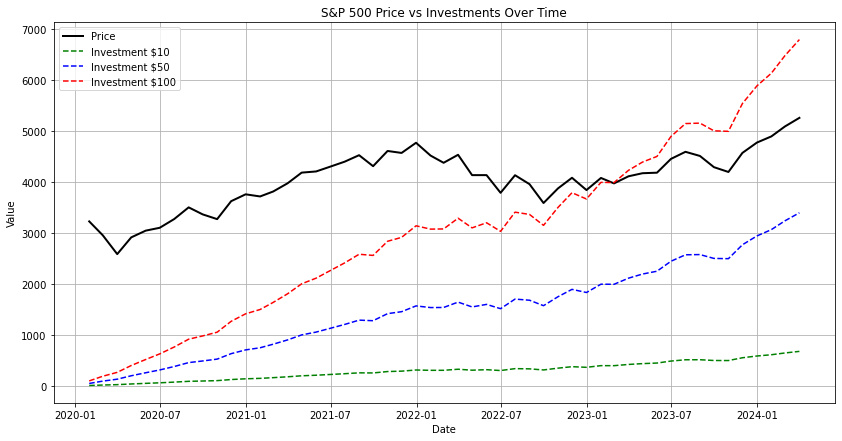

In [30]:
# Ploting the price and the investments

def plot_investment_vs_price(data, asset_name):
    plt.figure(figsize=(14, 7))
    
    # Plot the price
    plt.plot(data.index, data['price'], label='Price', color='black', linewidth=2)

    # Plot the investments
    plt.plot(data.index, data['total_value_10'], label='Investment $10', marker='', linestyle='--', color='green')
    plt.plot(data.index, data['total_value_50'], label='Investment $50', marker='', linestyle='--', color='blue')
    plt.plot(data.index, data['total_value_100'], label='Investment $100', marker='', linestyle='--', color='red')

    plt.title(f'{asset_name} Price vs Investments Over Time')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)
    plt.show()

# Call the function for each asset
plot_investment_vs_price(bitcoin_results, 'Bitcoin')
plot_investment_vs_price(ethereum_results, 'Ethereum')
plot_investment_vs_price(gold_results, 'Gold')
plot_investment_vs_price(sp500_results, 'S&P 500')



**Investment Outcomes:** The purpose of this analysis is to evaluate the effectiveness of a uniform investment strategy (investing $100, $50, or $10 monthly) across different asset types over a given period (51 months). This helps to understand how each asset performed under the same investment conditions. By creating a bar chart that shows both the total amount invested and the net gain for each asset, it can quickly visualize which investments yielded the highest returns and how they compare to the amount invested. This type of analysis is crucial for financial reporting and planning, helping stakeholders understand where investments have succeeded or failed.

The bar chart below illustrates the total amount of dollars invested and the total net gains for all assets.

Total Invested: Plotted as gray bars, these represent the total amount of money put into each asset over time.

Net Gains: Plotted as green bars on top of the total invested bars, these indicate the additional value gained beyond the initial investment.



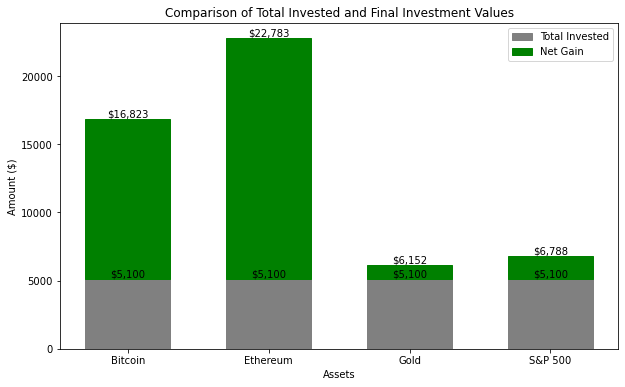

Total Amount Invested and Final Values:
Bitcoin - Invested: $5100, Final Value: $16823.91, Net Gain: $11723.91
Ethereum - Invested: $5100, Final Value: $22783.02, Net Gain: $17683.02
Gold - Invested: $5100, Final Value: $6153.00, Net Gain: $1053.00
S&P 500 - Invested: $5100, Final Value: $6788.03, Net Gain: $1688.03


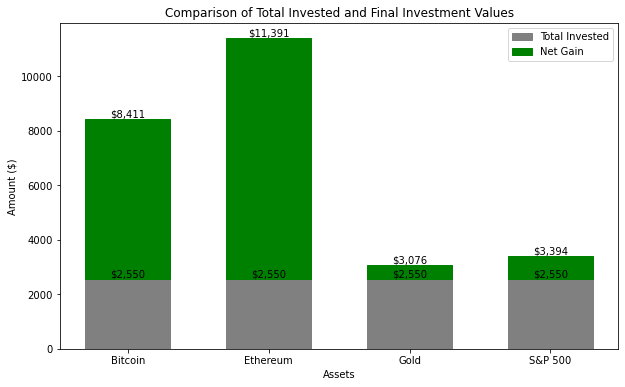

Total Amount Invested and Final Values:
Bitcoin - Invested: $2550, Final Value: $8411.96, Net Gain: $5861.96
Ethereum - Invested: $2550, Final Value: $11391.50, Net Gain: $8841.50
Gold - Invested: $2550, Final Value: $3076.50, Net Gain: $526.50
S&P 500 - Invested: $2550, Final Value: $3394.01, Net Gain: $844.01


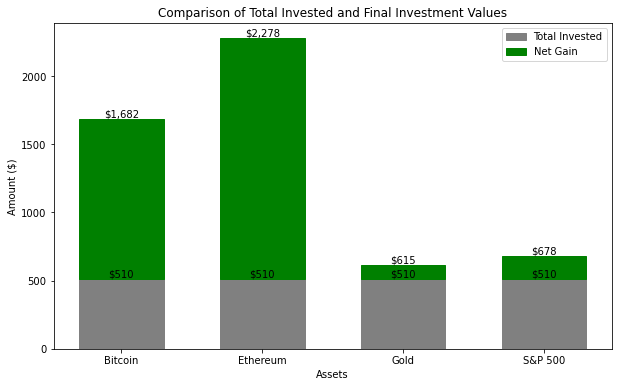

Total Amount Invested and Final Values:
Bitcoin - Invested: $510, Final Value: $1682.39, Net Gain: $1172.39
Ethereum - Invested: $510, Final Value: $2278.30, Net Gain: $1768.30
Gold - Invested: $510, Final Value: $615.30, Net Gain: $105.30
S&P 500 - Invested: $510, Final Value: $678.80, Net Gain: $168.80


In [47]:
#Plot the 100 Dollar Investments
# List of assets and corresponding data
assets = ['Bitcoin', 'Ethereum', 'Gold', 'S&P 500']
number_of_months = 51  # 51 months of data


# Actual final values from data
final_investment_values = {
    'Bitcoin': 16823.91387193938,  
    'Ethereum': 22783.016483278756,
    'Gold': 6152.995097803036,
    'S&P 500': 6788.025994550399
}

# Calculate the total amount invested for each asset
total_invested = number_of_months * 100  # Total amount invested per asset

# Arrays to store data for plotting
total_invested_array = [total_invested] * len(assets)  # Repeated total invested for each asset
final_values = [final_investment_values[asset] for asset in assets]
net_gains = [final_value - total_invested for final_value in final_values]

# Create bar chart
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.6

# Plot total invested
bars1 = ax.bar(assets, total_invested_array, color='grey', edgecolor='grey', width=bar_width, label='Total Invested')

# Plot net gains on top of the total invested
bars2 = ax.bar(assets, net_gains, color='green', edgecolor='green', width=bar_width, bottom=total_invested_array, label='Net Gain')

ax.set_xlabel('Assets')
ax.set_ylabel('Amount ($)')
ax.set_title('Comparison of Total Invested and Final Investment Values')
ax.legend()

# Adding value labels on top of each bar
for bar in bars1 + bars2:
    yval = bar.get_height() + bar.get_y()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'${int(yval):,}', ha='center', va='bottom', fontsize=10)

plt.show()

# Print the numerical values for clarity
print("Total Amount Invested and Final Values:")
for asset in assets:
    final_value = final_investment_values[asset]
    net_gain = final_value - total_invested
    print(f"{asset} - Invested: ${total_invested}, Final Value: ${final_value:.2f}, Net Gain: ${net_gain:.2f}")


    
#Plot the 50 Dollar Investments    
# List of assets and corresponding data
assets = ['Bitcoin', 'Ethereum', 'Gold', 'S&P 500']
number_of_months = 51  # 51 months of data


# Actual final values from data
final_investment_values = {
    'Bitcoin': 8411.96,  
    'Ethereum': 11391.5,
    'Gold': 3076.5,
    'S&P 500': 3394.01
}

# Calculate the total amount invested for each asset
total_invested = number_of_months * 50  # Total amount invested per asset

# Arrays to store data for plotting
total_invested_array = [total_invested] * len(assets)  # Repeated total invested for each asset
final_values = [final_investment_values[asset] for asset in assets]
net_gains = [final_value - total_invested for final_value in final_values]

# Create bar chart
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.6

# Plot total invested
bars1 = ax.bar(assets, total_invested_array, color='grey', edgecolor='grey', width=bar_width, label='Total Invested')

# Plot net gains on top of the total invested
bars2 = ax.bar(assets, net_gains, color='green', edgecolor='green', width=bar_width, bottom=total_invested_array, label='Net Gain')

ax.set_xlabel('Assets')
ax.set_ylabel('Amount ($)')
ax.set_title('Comparison of Total Invested and Final Investment Values')
ax.legend()

# Adding value labels on top of each bar
for bar in bars1 + bars2:
    yval = bar.get_height() + bar.get_y()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'${int(yval):,}', ha='center', va='bottom', fontsize=10)

plt.show()

# Print the numerical values for clarity
print("Total Amount Invested and Final Values:")
for asset in assets:
    final_value = final_investment_values[asset]
    net_gain = final_value - total_invested
    print(f"{asset} - Invested: ${total_invested}, Final Value: ${final_value:.2f}, Net Gain: ${net_gain:.2f}")



    
#Plot the 10 Dollar Investments    
# List of assets and corresponding data
assets = ['Bitcoin', 'Ethereum', 'Gold', 'S&P 500']
number_of_months = 51  # 51 months of data


# Actual final values from data
final_investment_values = {
    'Bitcoin': 1682.39,  
    'Ethereum': 2278.3,
    'Gold': 615.3,
    'S&P 500': 678.803
}

# Calculate the total amount invested for each asset
total_invested = number_of_months * 10  # Total amount invested per asset

# Arrays to store data for plotting
total_invested_array = [total_invested] * len(assets)  # Repeated total invested for each asset
final_values = [final_investment_values[asset] for asset in assets]
net_gains = [final_value - total_invested for final_value in final_values]

# Create bar chart
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.6

# Plot total invested
bars1 = ax.bar(assets, total_invested_array, color='grey', edgecolor='grey', width=bar_width, label='Total Invested')

# Plot net gains on top of the total invested
bars2 = ax.bar(assets, net_gains, color='green', edgecolor='green', width=bar_width, bottom=total_invested_array, label='Net Gain')

ax.set_xlabel('Assets')
ax.set_ylabel('Amount ($)')
ax.set_title('Comparison of Total Invested and Final Investment Values')
ax.legend()

# Adding value labels on top of each bar
for bar in bars1 + bars2:
    yval = bar.get_height() + bar.get_y()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'${int(yval):,}', ha='center', va='bottom', fontsize=10)

plt.show()

# Print the numerical values for clarity
print("Total Amount Invested and Final Values:")
for asset in assets:
    final_value = final_investment_values[asset]
    net_gain = final_value - total_invested
    print(f"{asset} - Invested: ${total_invested}, Final Value: ${final_value:.2f}, Net Gain: ${net_gain:.2f}")



**Moving Average Trends:** this technique is used to smooth out short term fluctuations and highlight trends. When deciding on the window size for calculating the moving average, there isn't a one size fits all answer; it largely depends on the specific goals of the analysis and the characteristics of the data. Since we are using a period of 51 months we can implement a variety of window sizes depending on what kind of trend we want to see.

* Short-Term Trends: If we are interested in recent trends or seasonal effects within a year, shorter windows like 3, 6, or 12 months are suitable.

* Long-Term Trends: For a broader perspective on the asset's performance over several years, a longer window (such as 24 or 36 months) might be more informative.

The function that is being used is called plot_multiple_moving_averages, this function is designed to visualize the price trends of financial assets alon their moving averages over different time windows. This visualization is fundemental for assesing trends and potential turning points.
In the code for the plt.plot(data['price'], label='Actual Price', color='gray', alpha=0.5), the (alpha=0.5) serves as the baseline against which the moving averages will be compared. The  list of specified time windows (6, 12, 24, 36 months), for each window computes the Simple Moving Average (SMA) by applying the rolling(window=window).mean() method to the price data. This calculates the average price over the past 'window' months for each point in time, smoothing out short-term fluctuations and highlighting longer-term trends.

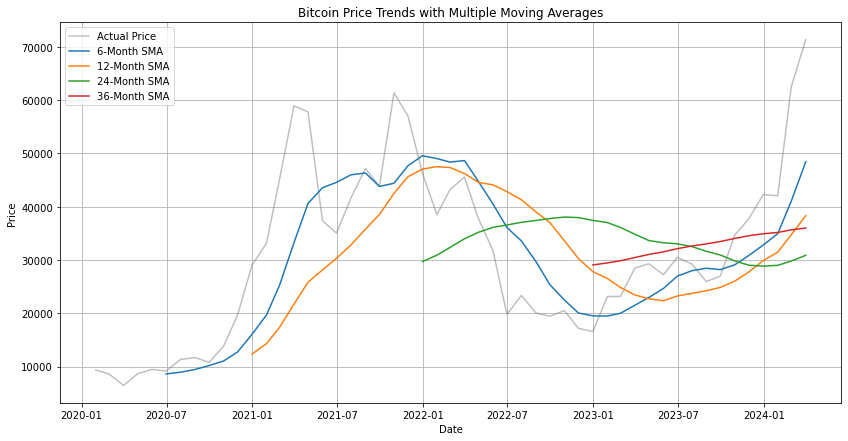

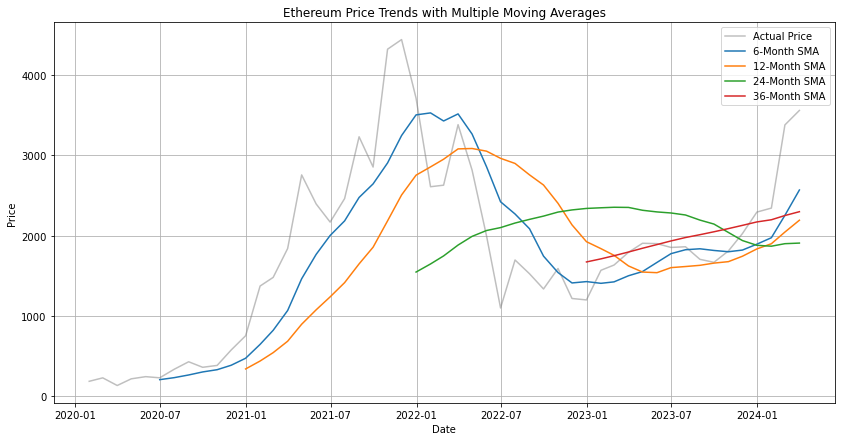

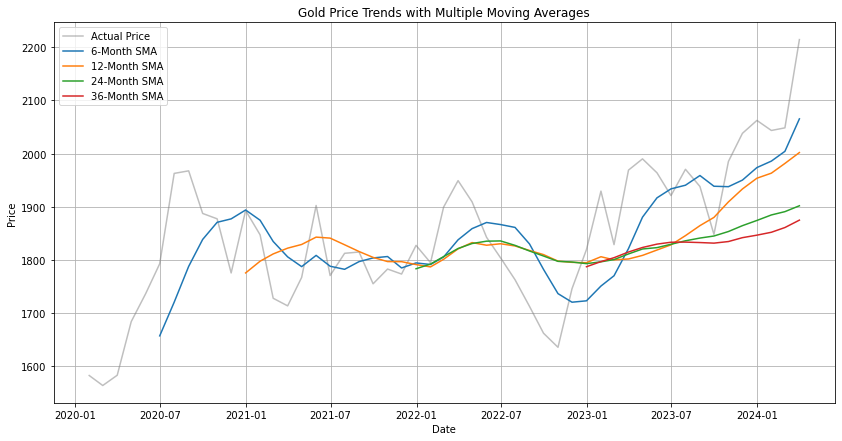

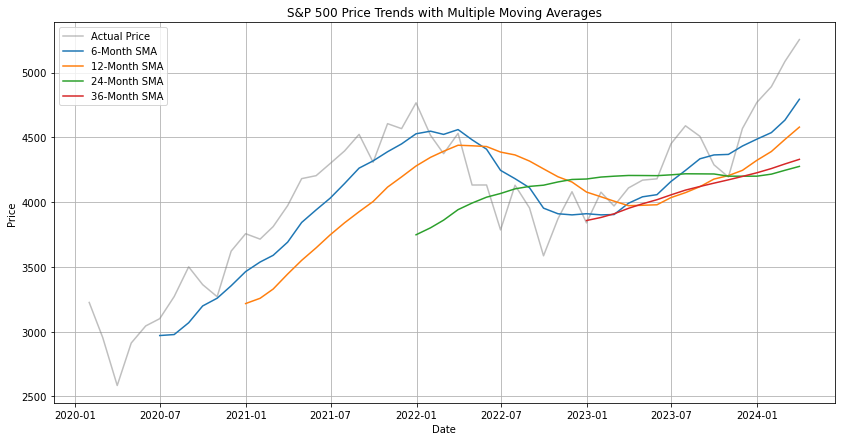

In [40]:
# Define a function to plot moving average trends
def plot_multiple_moving_averages(data, asset_name, windows):
    plt.figure(figsize=(14, 7))
    plt.plot(data['price'], label='Actual Price', color='gray', alpha=0.5)

    for window in windows:
        data[f'SMA_{window}'] = data['price'].rolling(window=window).mean()
        plt.plot(data[f'SMA_{window}'], label=f'{window}-Month SMA')

    plt.title(f'{asset_name} Price Trends with Multiple Moving Averages')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.show()


# Simple Moving Average Windows
windows = [6, 12, 24, 36]

# Plot moving averages for all assets
plot_multiple_moving_averages(bitcoin_results, 'Bitcoin', windows)
plot_multiple_moving_averages(ethereum_results, 'Ethereum', windows)
plot_multiple_moving_averages(gold_results, 'Gold', windows)
plot_multiple_moving_averages(sp500_results, 'S&P 500', windows)


**Machine Learning Model for Time Series Prediction LSTM Neural Network Setup:**
a Long Short-Term Memory (LSTM) neural network to predict future prices of various financial assets using historical data. This deep learning model is particularly suited to sequential data like time series, which is commonly found in financial markets. 


**Overview of the LSTM Model:**


* Creating Sequences:

Nested create_sequences function generates sequences from the price data. Each sequence is used as input (X) to the LSTM, with the corresponding next price as the output (y) to predict. This preparation is necessary for training the LSTM, which requires input in sequences to capture temporal dependencies.

* Scaling:

Prices are scaled between 0 and 1 using MinMaxScaler. This normalization helps to speed up the training process by ensuring numerical stability and is common practice in neural network models.

* Data Splitting:

The data is split into training and testing sets, with 20% of the data reserved for testing. This split helps evaluate the model on unseen data, providing an estimate of model performance.

* LSTM Model Architecture:

The model consists of bidirectional LSTM layers, which enhance the learning capacity by providing the network with forward and backward information about the dataset. Dropout and BatchNormalization layers are included to prevent overfitting and improve model generalization.

* Training:

The model is compiled and trained using the Adam optimizer and mean squared error loss function.
Early stopping is implemented to stop training when the validation loss stops decreasing, preventing overfitting.

* Prediction and Visualization:

After training, the model predicts future prices using the test set. Predicted prices are inverse-transformed to return them to their original scale. The function returns these predictions along with the actual prices and their corresponding dates for plotting.

* Plotting Results:

For each asset, predicted and actual prices are plotted against dates to visually assess the model's performance.
This visualization is crucial for understanding how well the model has learned and can mimic the underlying trends in the asset prices.



Why Use LSTM in this dataset?

LSTMs can capture complex nonlinear patterns in time series data, making them ideal for predicting stock prices, trading volumes, and market indices, where past behavior and sequential dependencies significantly influence future outcomes.
This also helps in risk management, accurate predictions help in managing risks by forecasting downturns or upturns in market prices. Traders and financial institutions can use these predictions to make informed decisions, enhancing profitability and minimizing losses.


Conclusion:
The use of LSTM models in financial markets offers advanced tools for analyzing and predicting asset price movements. By leveraging historical data and the sequential modeling capability of LSTMs, financial analysts can obtain insights that are deeply embedded in the data but may not be apparent or accessible through traditional analytical techniques. This approach not only supports better financial decisions but also enhances understanding of market dynamics.


The function:

process_and_model: A function to normalize price data, create sequences for LSTM input, split data into training and testing sets, define and train an LSTM model, and predict future prices. It uses a sequence length parameter to determine how many past points to use for predictions.

Epoch 1/100
1/1 [==============================] - 6s 6s/step - loss: 0.0595 - val_loss: 0.3977
Epoch 2/100
1/1 [==============================] - 0s 47ms/step - loss: 0.2865 - val_loss: 0.3742
Epoch 3/100
1/1 [==============================] - 0s 47ms/step - loss: 0.0958 - val_loss: 0.3503
Epoch 4/100
1/1 [==============================] - 0s 56ms/step - loss: 0.1209 - val_loss: 0.3464
Epoch 5/100
1/1 [==============================] - 0s 35ms/step - loss: 0.0740 - val_loss: 0.3472
Epoch 6/100
1/1 [==============================] - 0s 46ms/step - loss: 0.0696 - val_loss: 0.3508
Epoch 7/100
1/1 [==============================] - 0s 49ms/step - loss: 0.0675 - val_loss: 0.3512
Epoch 8/100
1/1 [==============================] - 0s 49ms/step - loss: 0.0565 - val_loss: 0.3470
Epoch 9/100
1/1 [==============================] - 0s 43ms/step - loss: 0.0739 - val_loss: 0.3425
Epoch 10/100
1/1 [==============================] - 0s 48ms/step - loss: 0.0408 - val_loss: 0.3354
Epoch 11/100
1/1 [===

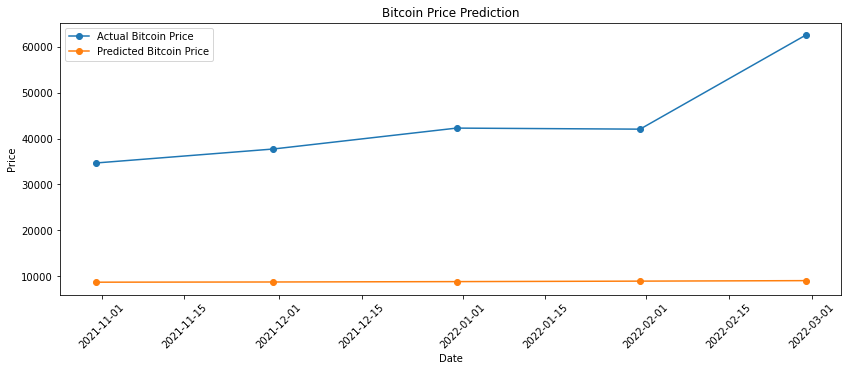

Epoch 1/100
1/1 [==============================] - 5s 5s/step - loss: 0.2562 - val_loss: 0.2458
Epoch 2/100
1/1 [==============================] - 0s 50ms/step - loss: 0.0509 - val_loss: 0.2340
Epoch 3/100
1/1 [==============================] - 0s 46ms/step - loss: 0.1699 - val_loss: 0.2401
Epoch 4/100
1/1 [==============================] - 0s 45ms/step - loss: 0.1274 - val_loss: 0.2540
Epoch 5/100
1/1 [==============================] - 0s 31ms/step - loss: 0.0547 - val_loss: 0.2631
Epoch 6/100
1/1 [==============================] - 0s 44ms/step - loss: 0.0700 - val_loss: 0.2682
Epoch 7/100
1/1 [==============================] - 0s 46ms/step - loss: 0.0662 - val_loss: 0.2694
Epoch 8/100
1/1 [==============================] - 0s 32ms/step - loss: 0.1102 - val_loss: 0.2694
Epoch 9/100
1/1 [==============================] - 0s 46ms/step - loss: 0.0732 - val_loss: 0.2676
Epoch 10/100
1/1 [==============================] - 0s 43ms/step - loss: 0.0668 - val_loss: 0.2629
Epoch 11/100
1/1 [===

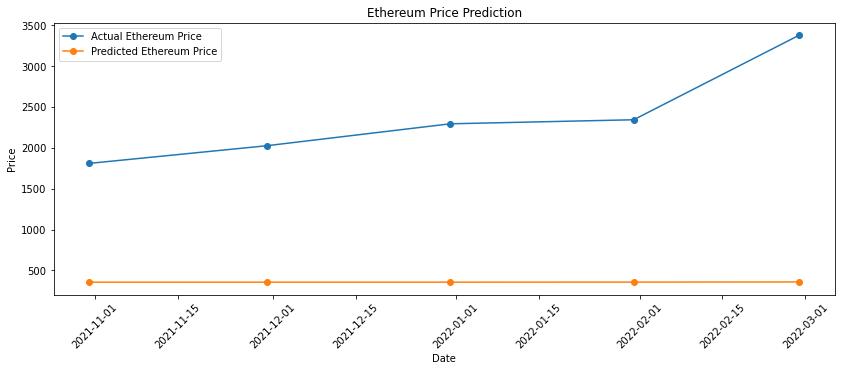

Epoch 1/100
1/1 [==============================] - 5s 5s/step - loss: 0.3222 - val_loss: 0.4655
Epoch 2/100
1/1 [==============================] - 0s 46ms/step - loss: 0.1490 - val_loss: 0.4130
Epoch 3/100
1/1 [==============================] - 0s 47ms/step - loss: 0.1300 - val_loss: 0.3998
Epoch 4/100
1/1 [==============================] - 0s 32ms/step - loss: 0.1437 - val_loss: 0.4066
Epoch 5/100
1/1 [==============================] - 0s 46ms/step - loss: 0.1000 - val_loss: 0.4208
Epoch 6/100
1/1 [==============================] - 0s 39ms/step - loss: 0.0664 - val_loss: 0.4353
Epoch 7/100
1/1 [==============================] - 0s 40ms/step - loss: 0.0861 - val_loss: 0.4451
Epoch 8/100
1/1 [==============================] - 0s 31ms/step - loss: 0.0558 - val_loss: 0.4530
Epoch 9/100
1/1 [==============================] - 0s 47ms/step - loss: 0.0988 - val_loss: 0.4587
Epoch 10/100
1/1 [==============================] - 0s 45ms/step - loss: 0.1026 - val_loss: 0.4638
Epoch 11/100
1/1 [===

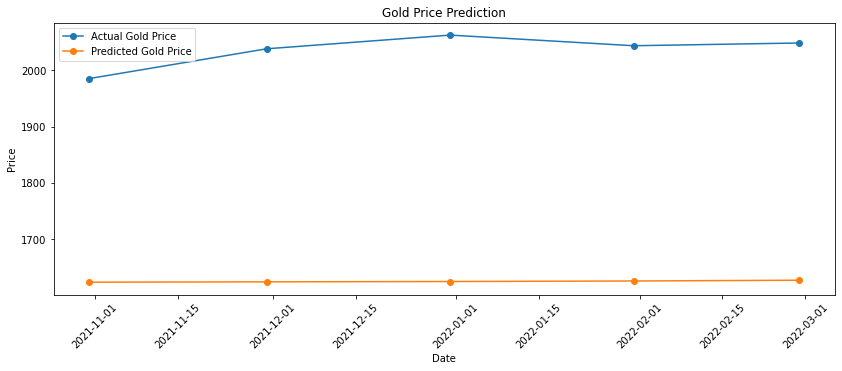

Epoch 1/100
1/1 [==============================] - 5s 5s/step - loss: 0.2931 - val_loss: 0.6278
Epoch 2/100
1/1 [==============================] - 0s 46ms/step - loss: 0.0900 - val_loss: 0.5865
Epoch 3/100
1/1 [==============================] - 0s 33ms/step - loss: 0.1009 - val_loss: 0.5745
Epoch 4/100
1/1 [==============================] - 0s 32ms/step - loss: 0.1506 - val_loss: 0.5798
Epoch 5/100
1/1 [==============================] - 0s 34ms/step - loss: 0.1320 - val_loss: 0.5939
Epoch 6/100
1/1 [==============================] - 0s 48ms/step - loss: 0.0861 - val_loss: 0.6002
Epoch 7/100
1/1 [==============================] - 0s 46ms/step - loss: 0.0787 - val_loss: 0.6041
Epoch 8/100
1/1 [==============================] - 0s 46ms/step - loss: 0.1188 - val_loss: 0.5977
Epoch 9/100
1/1 [==============================] - 0s 43ms/step - loss: 0.1089 - val_loss: 0.5883
Epoch 10/100
1/1 [==============================] - 0s 34ms/step - loss: 0.0521 - val_loss: 0.5760
Epoch 11/100
1/1 [===

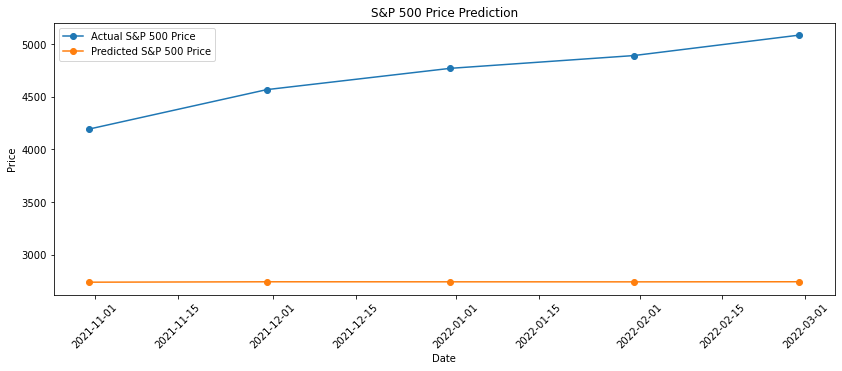

In [42]:
#Long Short Term Memory Neural Network

#bitcoin_results, ethereum_results, gold_results, and sp500_results are previously defined DataFrames
assets = {
    'Bitcoin': bitcoin_results,
    'Ethereum': ethereum_results,
    'Gold': gold_results,
    'S&P 500': sp500_results
}

# Your previously defined function
def process_and_model(data, asset_name, sequence_length=25):
    
    def create_sequences(data, seq_length):
        xs, ys = [], []
        for i in range(len(data)-seq_length-1):
            x = data[i:(i+seq_length)]
            y = data[i+seq_length]
            xs.append(x)
            ys.append(y)
        return np.array(xs), np.array(ys)
    
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data['price'].values.reshape(-1, 1))

    X, y = create_sequences(scaled_data, sequence_length)
    if len(X) == 0:
        print(f"Not enough data to create sequences for {asset_name}.")
        return None, None, None

    try:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)
    except ValueError as e:
        print(f"Error splitting {asset_name}: {e}")
        return None, None, None

    X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
    X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

    model = Sequential([
        Bidirectional(LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], 1))),
        Dropout(0.3),
        BatchNormalization(),
        LSTM(64),
        Dropout(0.3),
        Dense(1)
    ])

    optimizer = Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer, loss='mean_squared_error')

    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

    predicted_prices = model.predict(X_test)
    predicted_prices = scaler.inverse_transform(predicted_prices)
    actual_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

    test_dates = data.index[len(data) - len(X_test) - sequence_length: -sequence_length]

    return predicted_prices, actual_prices, test_dates

# Adjust sequence length
sequence_length = 25

# Process each asset
for asset_name, asset_data in assets.items():
    pred, actual, dates = process_and_model(asset_data, asset_name, sequence_length)
    if pred is not None:
        plt.figure(figsize=(14, 5))
        plt.plot(dates, actual, label=f'Actual {asset_name} Price', marker='o')
        plt.plot(dates, pred, label=f'Predicted {asset_name} Price', marker='o')
        plt.title(f'{asset_name} Price Prediction')
        plt.xlabel('Date')
        plt.ylabel('Price')
        plt.xticks(rotation=45)
        plt.legend()
        plt.show()
    else:
        print(f"Skipping {asset_name} due to insufficient data.")

**MSE, RMSE, MAE, and MAPE** To find out whether or not our model is accurate we need to evaluate the accuracy of predictions made by the Long Short Term Memory(LSTM) model. Typically the model relies on error metrics rather than a direct percentage accuracy which is more common in classification tasks. For regression tasks like predicting prices, common metrics include the Mean Squared Error (MSE), Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), and sometimes the Mean Absolute Percentage Error (MAPE). These metrics help quantify the difference between predicted values and actual values. 
Lets break down what each of these do for a better understanding:

* Mean Squared Error (MSE): used to measure the average of squares of the errors or the average squared difference between the estimated values and the actual value.

* Root Mean Squared Error (RMSE): provides a measure of the magnitude of the error in the same units as the data.

* Mean Absolute Error (MAE): measures the average magnitude of the errors in a set of predictions without considering their direction.

* Mean Absolute Percentage Error (MAPE): Measures the accuracy as a percentage and can be more intuitive to understand.

Lets understand the values below:

* Mean Squared Error (MSE): 25.0*
A MSE of 25.0 means that the average of the squared differences between the predicted and actual values is 25.
The smaller the MSE, the closer you are to finding the line of best fit. While an MSE of 25 might indicate good model performance in scenarios where the range of your target values is large, it could also suggest poor predictions if the target values typically range close to zero. 

* Root Mean Squared Error (RMSE): 5.0
The value of 5.0 means the standard deviation of the prediction errors is 5 units. A smaller RMSE is better, and a value of 5 indicates that on average, the predictions deviate from the actual values by 5 units. Assessing whether this is acceptable depends on the context and scale of the data.

* Mean Absolute Error (MAE): 5.0
A MAE of 5.0 means that on average, the absolute errors amount to 5 units. MAE is less sensitive to outliers compared to MSE and provides a more robust measure of average error magnitude. A lower MAE is better. 

Mean Absolute Percentage Error (MAPE): 3.68%
A MAPE of 3.68% indicates that the model predictions are, on average, within 3.68% of the actual values.
Interpretation: MAPE is particularly useful because it provides a quick glance at accuracy in terms of percentage, which is easy to interpret. However, implies that, on average, the model's predictions are off by 3.68% from the actual values.

To find the actual percentage of accuracy, the below formula must be used:

Accuracy = 100% - 3.68 = 96.32


96.32% Accuracy: This suggests that, on average, the model’s predictions capture about 96.32% of the actual value.

Applicability: This approach of translating MAPE into accuracy works best when the errors are uniformly distributed and the values don’t include zeros; as MAPE can inflate disproportionately with values close to zero.
Relying solely on MAPE or derived accuracy for model evaluation might be misleading if not considered alongside other metrics like MSE, RMSE, MAE which provide different perspectives on error magnitude, variance, and impact of outliers.

3.68% MAPE doesn't accurately reflect the model's performance because the predictions diverge significantly from what is acceptable or expected in the use case.

It's vital to align the interpretation of model performance metrics with the practical requirements and expectations of the application. If the standard metrics suggest a high accuracy but practical performance feels inadequate, we need to consider adjusting the metrics or providing additional context to stakeholders to explain why the model may not meet operational expectations despite seemingly low error rates.

* The LSTM (Long Short-Term Memory) model is highly effective for predicting future stock and asset prices due to its ability to learn from historical data over time. However, the accuracy of its predictions heavily depends on the availability and quality of the data it is trained on. Insufficient data can lead to less reliable forecasts, underscoring the importance of a robust dataset for model training.

* Furthermore, the relevance and diversity of the data used can significantly influence the model's performance. For instance, incorporating additional datasets such as weather information can be beneficial, particularly if there are underlying correlations between these factors and market behaviors on trading days. Integrating diverse and contextually relevant data sources can enhance the model's ability to capture complex patterns and improve the reliability of its predictions.


In [45]:
def calculate_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Absolute Percentage Error (MAPE): {mape}%")
    return mse, rmse, mae, mape

# Assuming you have these values from your model's predictions
# predicted_prices = model.predict(X_test) # Uncomment and use this line if you're integrating with live model data
# predicted_prices = scaler.inverse_transform(predicted_prices) # Adjust if scaling was applied
# actual_prices = scaler.inverse_transform(y_test.reshape(-1, 1)) # Adjust if scaling was applied

# Sample data for demonstration
predicted_prices = np.array([120, 130, 140, 150])  # Sample predicted prices
actual_prices = np.array([115, 135, 145, 155])     # Sample actual prices

# Calculate metrics
calculate_metrics(actual_prices, predicted_prices)

Mean Squared Error (MSE): 25.0
Root Mean Squared Error (RMSE): 5.0
Mean Absolute Error (MAE): 5.0
Mean Absolute Percentage Error (MAPE): 3.681403026085524%


(25.0, 5.0, 5.0, 3.681403026085524)

**Monte Carlo Simulation using Geometric Brownian Motion** to forecast future price paths for various financial assets like Bitcoin, Ethereum, Gold, and the S&P 500. As we can see from the previous model (LSTM) our data is limited for an accurate prediction of the price for each asset. Instead we will implement a monte carlo simulation. This simulation basically generates multiple potential future price paths which not only shows the most likely path but also explores a range of possibile outcomes and their likelihood.

The Monte Carlo simulation is flexible and robust, applicable under various assumptions and conditions, making them suitable for complex financial instruments whose risk and return profiles are not easily captured by simpler models. We will be running 100,00 simulations for a more accurate simulation.

The function:

monte_carlo_simulation: This function performs a Monte Carlo simulation using GBM to forecast future price paths of the financial assets.

simulations: The number of simulation paths to generate.

Log_Returns: This line calculates the logarithmic returns of the prices. Log returns are preferred over simple returns for financial models because they are time additive.

Drift: The drift is calculated by adjusting the mean return to account for the variance. It reflects the expected return of the asset, considering its volatility.

Daily Shocks: This generates random values from a normal distribution, which are used to simulate the randomness in the price path. These shocks represent the daily fluctuations in the asset's return, influenced by its volatility

Outcome: The graph produced by the Monte Carlo simulation illustrates the variety of potential future price paths for the asset in question. Each line in the multicolored display represents a different possible trajectory based on the underlying assumptions of the model, such as market volatility and historical price trends. This rich tapestry of outcomes underscores the inherent uncertainty in forecasting financial markets, but also showcases the power of Monte Carlo simulations in capturing a wide range of possibilities. The array of lines on the graph is not just visually striking but also informative. Each line maps out a potential future scenario that could unfold based on current and past market dynamics. This diversity helps analysts and investors appreciate the range of possible future events, rather than focusing on a single expected outcome.

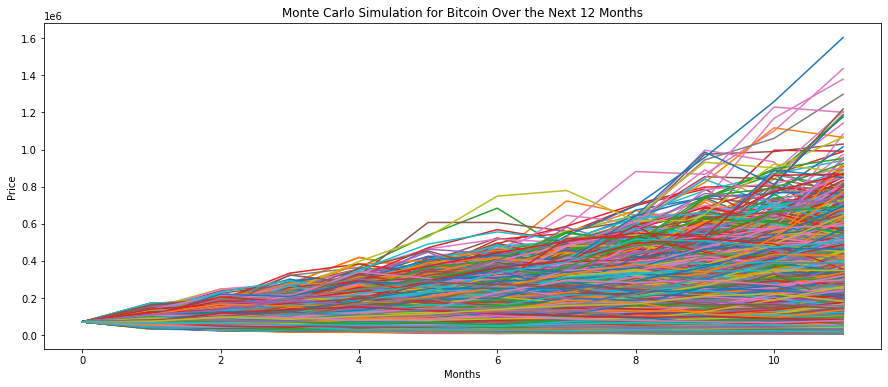

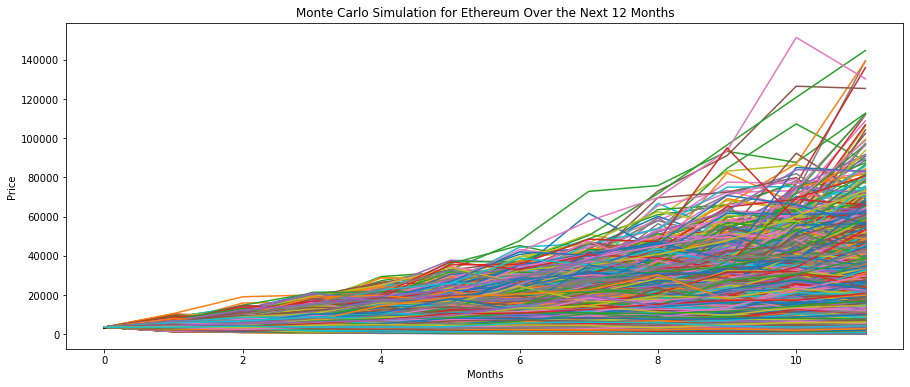

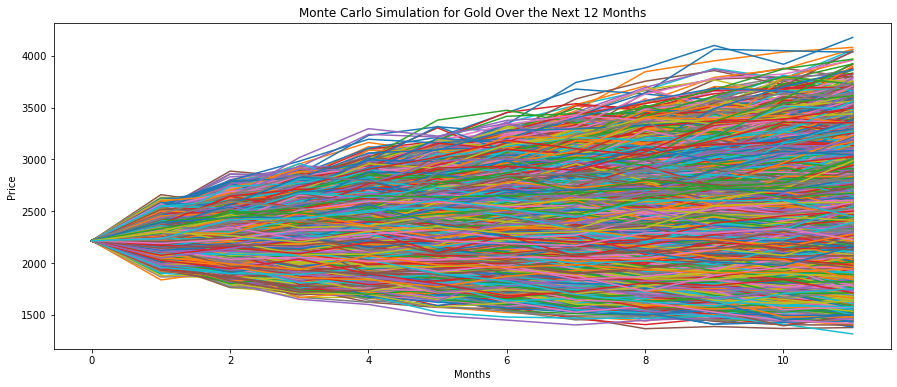

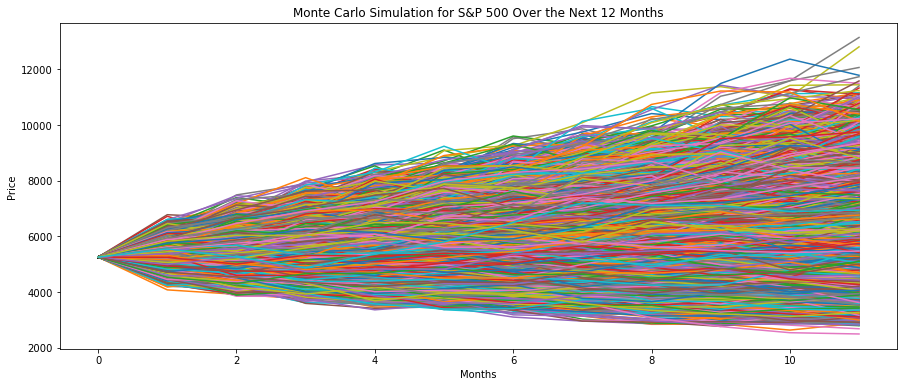

In [49]:

#Monte Carlo Simulation
# Define the Monte Carlo simulation function
def monte_carlo_simulation(data, periods=12, simulations=100000):
    """Perform Monte Carlo simulation using Geometric Brownian Motion."""
    # Calculate the log returns
    log_returns = np.log(data['price'] / data['price'].shift(1))
    
    # Calculate mean and standard deviation of log returns
    mean = log_returns.mean()
    sigma = log_returns.std()
    
    # Drift and random component
    drift = mean - (0.5 * sigma ** 2)
    daily_shocks = np.random.normal(drift, sigma, (periods, simulations))
    
    # Simulate future price paths
    price_paths = np.zeros_like(daily_shocks)
    price_paths[0] = data['price'].iloc[-1]  # Start simulations at the last actual price
    
    for t in range(1, periods):
        price_paths[t] = price_paths[t - 1] * np.exp(daily_shocks[t])
    
    return price_paths

# Apply Monte Carlo simulation to each asset
for asset_data, asset_name in zip([bitcoin_results, ethereum_results, gold_results, sp500_results], 
                                  ['Bitcoin', 'Ethereum', 'Gold', 'S&P 500']):
    # Running the simulation
    simulations = monte_carlo_simulation(asset_data, periods=12, simulations=100000)
    
    # Plotting the results
    plt.figure(figsize=(15, 6))
    plt.plot(simulations)
    plt.title(f'Monte Carlo Simulation for {asset_name} Over the Next 12 Months')
    plt.xlabel('Months')
    plt.ylabel('Price')
    plt.show()


**Monte Carlo Simulation Validation** Validating the Monte Carlo simulation is crucial to help ensure that the model is not just theoretically sound but also practically useful and reliable. This helps confirm that the model accurately forecasts future behaviors based on historical data, this is essential because financial models often make significant assumptions about volatility, trends, and market behavior. 

In the financial markets the accuracy of a Monte Carlo simulation can affect investment decisions, asset allocation, and risk assessment strategies. If the model consistently overestimates or underestimates risk, it could lead to decisions that are either too conservative or too aggressive, impacting profitability and stability.


The function find_best correlation determins which of the simulated paths from the 100,000 simulations has the highest Pearson correlation coefficient with the historical price data.

In the function we added a loop which iterates over each simulated path. This is important as it ensures all simulations are tested between the historical prices and different paths. The next process is to keep track of the highest correlation and its corresponding index and then find the value with the highest correlation. 

The provided code segment is designed to identify the most closely correlated Monte Carlo simulation trajectory to the actual historical price data for various assets. This approach is useful for validating the stochastic model's accuracy and ensuring that it can replicate trends similar to those observed in real historical data. 


Finding the Best Correlation:

The function find_best_correlation is used to find which simulation path aligns most closely with these last 12 months of historical data.


Why implement this model?

* By comparing simulated outcomes with historical data, you validate whether the Monte Carlo model can produce plausible future scenarios that reflect historical trends.

* Identifying simulations that best match historical data can help refine the parameters and assumptions used in the model, potentially leading to more accurate forecasts.

* Understanding the range and likelihood of potential future price movements helps in risk assessment and management, crucial for financial planning and investment strategies.

* Demonstrating that simulations can closely replicate real-world outcomes builds confidence among stakeholders in using these models for decision-making.

This approach highlights the practical application of Monte Carlo simulations in financial analytics, bridging theoretical models with real-world data to enhance strategic planning and risk analysis.

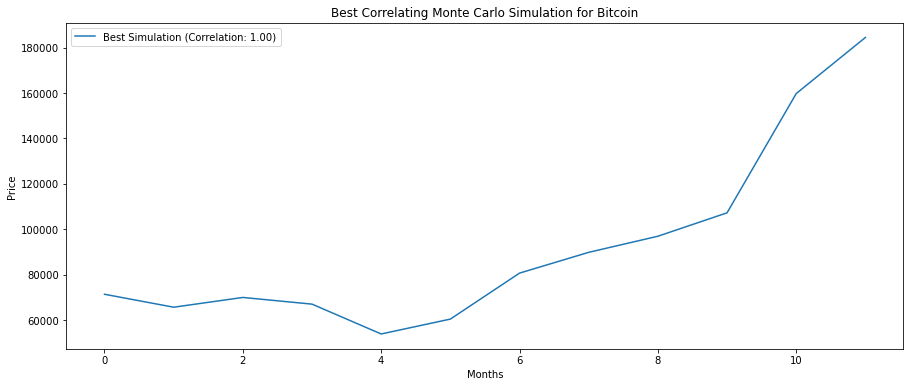

Bitcoin - Best Simulation Index: 1329, Correlation: 1.00


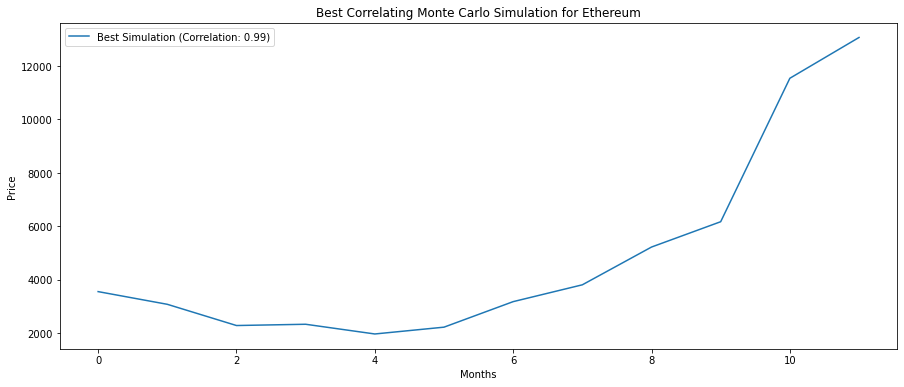

Ethereum - Best Simulation Index: 49522, Correlation: 0.99


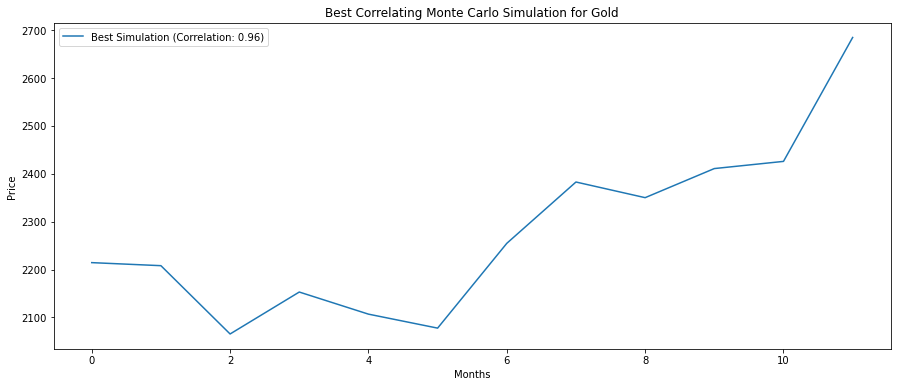

Gold - Best Simulation Index: 81662, Correlation: 0.96


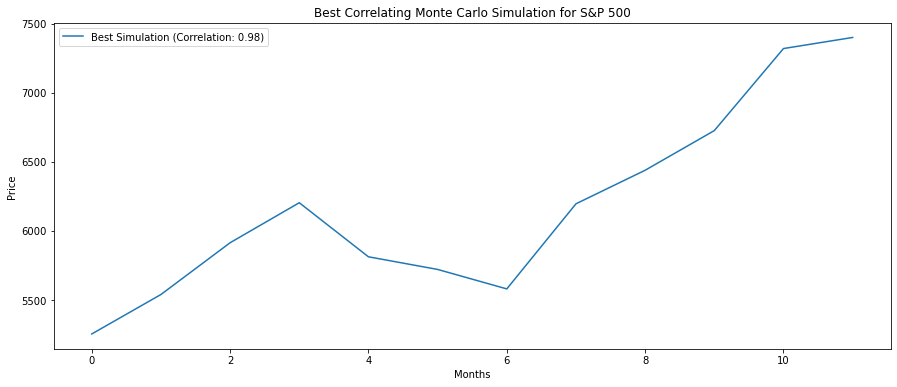

S&P 500 - Best Simulation Index: 71146, Correlation: 0.98


In [50]:
# Finding the most correlated model

def find_best_correlation(historical_data, simulated_data):
    best_correlation = -1
    best_index = -1
    # Ensure historical_data is a Series and not a DataFrame with a 'price' column
    if not isinstance(historical_data, pd.Series):
        raise TypeError("historical_data should be a pandas Series")
    
    # Calculate correlation for each simulation
    for i in range(simulated_data.shape[1]):
        simulated_prices = simulated_data[:, i]
        correlation, _ = pearsonr(historical_data, simulated_prices)  # Using historical_data directly
        if correlation > best_correlation:
            best_correlation = correlation
            best_index = i
    return best_index, best_correlation

# Usage remains the same
for asset_data, asset_name in zip([bitcoin_results, ethereum_results, gold_results, sp500_results], 
                                  ['Bitcoin', 'Ethereum', 'Gold', 'S&P 500']):
    # Running the simulation
    simulations = monte_carlo_simulation(asset_data, periods=12, simulations=100000)
    
    # Extract the last 12 months of price data as a Series
    historical_prices = asset_data['price'][-12:]  # This should be a Series

    # Find the best correlating simulation
    best_index, best_correlation = find_best_correlation(historical_prices, simulations)
    
    # Plotting the best simulation result
    plt.figure(figsize=(15, 6))
    plt.plot(simulations[:, best_index], label=f'Best Simulation (Correlation: {best_correlation:.2f})')
    plt.title(f'Best Correlating Monte Carlo Simulation for {asset_name}')
    plt.xlabel('Months')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

    print(f"{asset_name} - Best Simulation Index: {best_index}, Correlation: {best_correlation:.2f}")



**Conclusion:** 

* Overview of Investment Returns and Risk Analysis:

The analysis revealed that Ethereum offered the highest returns on investments of $100, $50, and $10, followed by Bitcoin, the S&P 500, and Gold in that order. However, alongside its superior returns, Ethereum also posed the highest risk, indicating a trade-off between return and risk. Bitcoin also displayed significant volatility. The S&P 500 and Gold showed similar levels of lower risk, making them potentially more stable but less lucrative investment options.

**Performance of Predictive Models:**

* LSTM Model: The Long Short-Term Memory (LSTM) model was implemented successfully to predict future asset prices based solely on date and closing prices. Although the model functioned correctly, the accuracy was constrained by the limited data scope. The model primarily used date and price information, lacking additional variables that might capture other influential market dynamics.

* Data Limitations: The results underscore the necessity for more extensive datasets to enhance the LSTM model’s accuracy. Incorporating data from broader domains, such as economic indicators, market sentiment, or geopolitical events, could provide a more holistic view and improve predictive performance.

* Model Accuracy and Market Complexity: Despite achieving close correlations with historical data, the LSTM model's predictions were not as accurate as desired. This limitation highlights the inherent challenge in forecasting financial markets, which are influenced by a multitude of unpredictable factors, making precise predictions exceptionally challenging.


**Monte Carlo Simulation Insights:**

* Purpose and Implementation: The Monte Carlo simulation was employed to explore multiple potential future price paths for each asset, enhancing our understanding of possible future scenarios. This approach was vital for assessing the feasibility of different market conditions and preparing for potential outcomes.

Correlation Results:

* Bitcoin showed a perfect correlation (Correlation: 1.00) in its best simulation, suggesting an excellent match between the simulated path and historical trends.

* Ethereum and the S&P 500 exhibited very high correlations (0.99 and 0.98, respectively), indicating that the simulations were highly representative of actual historical data.

* Gold displayed a slightly lower correlation (0.96), which, while still high, suggests a bit more divergence from past price behaviors.

**Strategic Implications and Further Research:**

* Model Utility: The analysis demonstrates the utility of using advanced predictive models and simulations in financial decision-making. By understanding both potential returns and risks, as well as the range of possible future asset prices, investors and financial analysts can make more informed decisions.

* Recommendations for Improvement: To further refine our models, we recommend expanding the datasets to include more variables that could impact asset prices. Continuous model validation and recalibration with updated data will also be crucial as market conditions evolve.

* Future Research: Further research should explore integrating alternative data sources, such as social media sentiment, economic indicators, or even weather patterns, which could provide additional predictive power to the models.


The combination of LSTM predictive modeling and Monte Carlo simulations has provided deep insights into potential investment returns and associated risks across different assets. While Ethereum emerged as the most profitable, albeit riskiest option, the comprehensive risk-return analysis facilitated by these sophisticated modeling techniques has been invaluable. Going forward, enhancing data collection and model sophistication will be key to capturing the complex dynamics of financial markets more accurately. Understanding the temporal dynamics of financial markets and the significance of the data collection period is essential for building effective predictive models. By carefully selecting the data's time frame and considering the market cycle in model training and simulation strategies, analysts can enhance both the accuracy of predictions and the effectiveness of investment strategies. This not only maximizes potential returns but also minimizes risks by providing a deeper understanding of when to enter or exit the market based on informed, model-driven insights.